# Basis Function Regression con Kernel

### Autor: Carlos Andrés Arroyave
### Fecha : 11 Agosto 2025
### Mail :  caarroyave1@correo.iue.edu.co
### Movil : 3015813032
### Actividad :  Regresion lineal con funciones bases y sklearn




## Importar librerias
Las siguientes lineas listan las librerias utilizadas en el desarrollo


In [9]:
# Script: comparar SVR, KernelRidge y LogisticRegression con 3 kernels y CV 10-fold
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import brier_score_loss
import warnings
warnings.filterwarnings("ignore")

# ----------------------------
# Config
# ----------------------------
dataset = load_breast_cancer()
X, y = dataset.data, dataset.target  # regresión continua

print (dataset.target_names)

['malignant' 'benign']


/Users/carlosandresarroyaveoutlook.com/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/carlosandresarroyaveoutlook.com/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/carlosandresarroyaveoutlook.com/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/carlosandresarroyaveoutlook.com/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/carlosandresarroyaveoutlook.com/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/carlosandresarroyaveoutlook.com/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: 

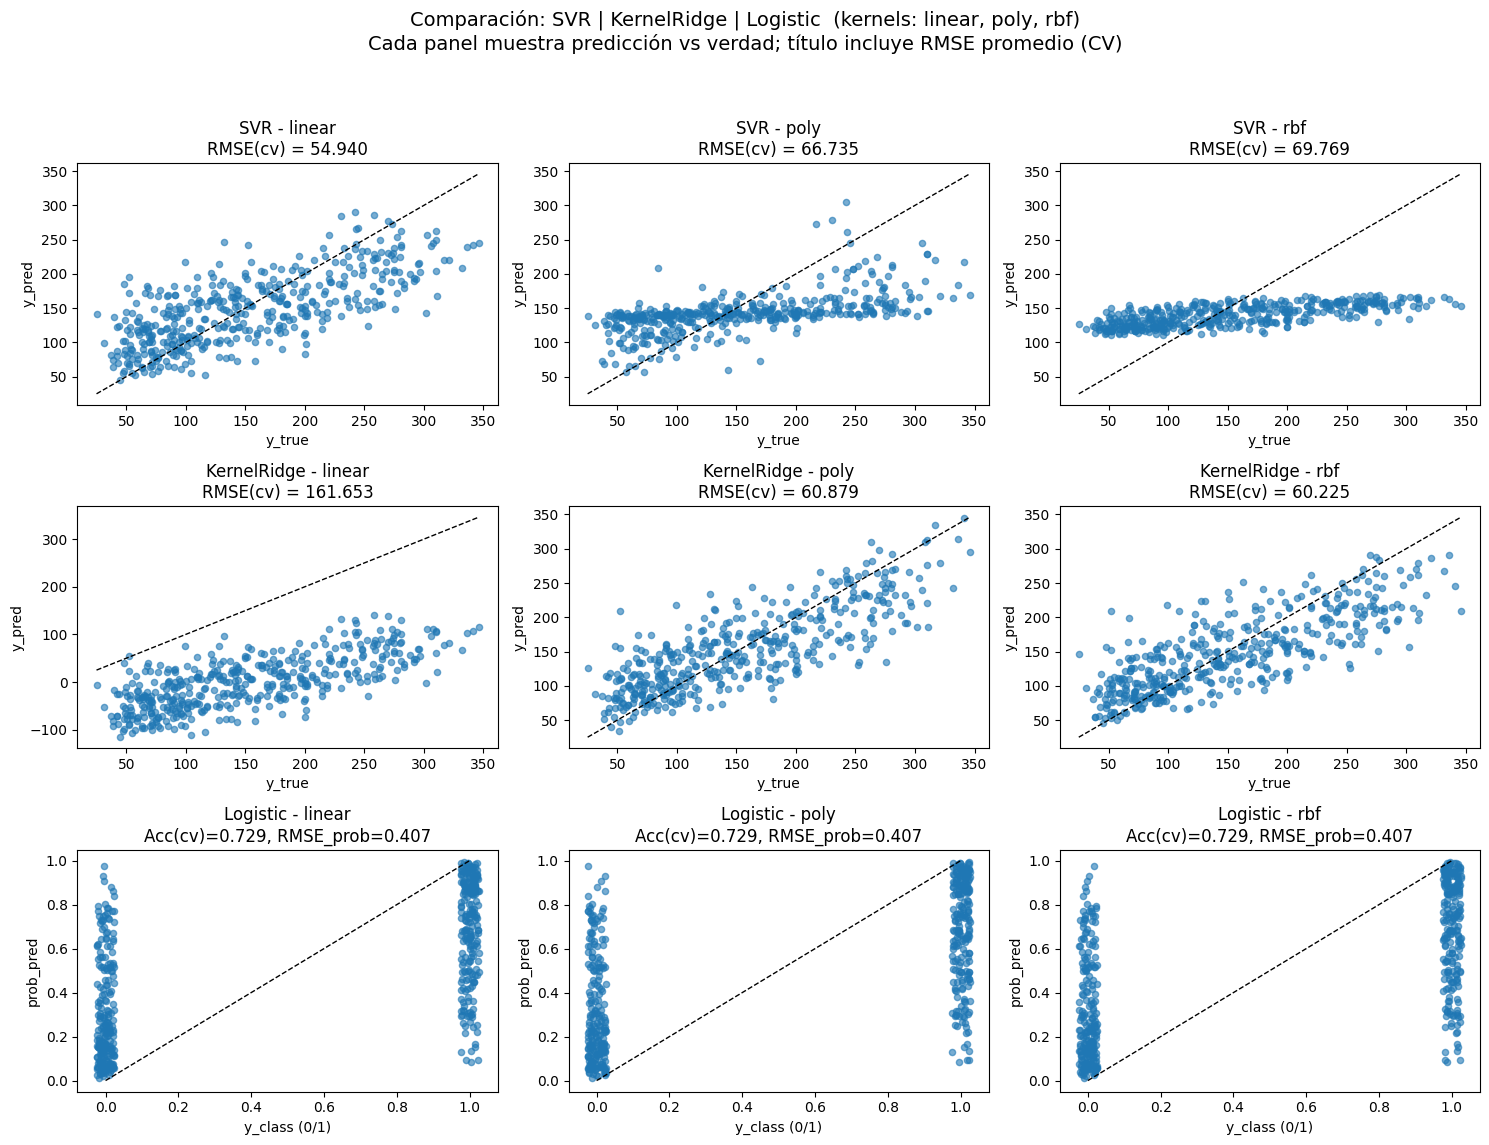


Resumen (para SVR/KernelRidge: RMSE; para Logistic: RMSE sobre probabilidades (Brier^0.5)):
kernel           linear       poly        rbf
model                                        
KernelRidge  161.652876  60.878748  60.224550
Logistic       0.406864   0.406864   0.406864
SVR           54.940066  66.734990  69.768850

 Mejor combinación (entre SVR y KernelRidge) según RMSE promedio (CV):
{'model': 'SVR', 'kernel': 'linear', 'rmse': np.float64(54.94006576601131)}


In [ ]:
# Script: comparar SVR, KernelRidge y LogisticRegression con 3 kernels y CV 10-fold
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import brier_score_loss
import warnings
warnings.filterwarnings("ignore")

# ----------------------------
# Config
# ----------------------------
dataset = load_diabetes()
X, y = dataset.data, dataset.target  # regresión continua

kernels = ['linear', 'poly', 'rbf']
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
random_state = 42

# Para almacenar resultados
results = []

# ----------------------------
# Helper: cross-val RMSE for regression models
# ----------------------------
def cv_rmse_regressor(estimator, X, y, cv):
    # cross_val_score with neg_mean_squared_error
    scores = cross_val_score(estimator, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
    rmse_scores = np.sqrt(-scores)  # one RMSE per fold
    return rmse_scores, rmse_scores.mean()

# ----------------------------
# Loop: probar modelos y kernels
# ----------------------------
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

plt.subplots_adjust(hspace=0.35, wspace=0.3)

best_regression = {'model': None, 'kernel': None, 'rmse': np.inf}

row = 0

for i, model_name in enumerate(['SVR', 'KernelRidge', 'Logistic']):
    for j, kernel in enumerate(kernels):
        ax = axes[i, j]

        if model_name == 'SVR':
            # Pipeline: scaling + SVR(kernel=...)
            pipe = Pipeline([('scaler', StandardScaler()), ('svr', SVR(kernel=kernel))])
            rmse_scores, rmse_mean = cv_rmse_regressor(pipe, X, y, kf)

            # entrenar con todo para graficar predicciones

            pipe.fit(X, y)
            y_pred = pipe.predict(X)

            # plot: true vs pred (regresión)
            ax.scatter(y, y_pred, s=20, alpha=0.6)
            ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', linewidth=1)
            ax.set_xlabel('y_true')
            ax.set_ylabel('y_pred')
            ax.set_title(f"SVR - {kernel}\nRMSE(cv) = {rmse_mean:.3f}")

            results.append({'model':'SVR', 'kernel':kernel, 'rmse_mean':rmse_mean,
                            'rmse_fold':rmse_scores, 'y_pred':y_pred})
            if rmse_mean < best_regression['rmse']:
                best_regression = {'model':'SVR','kernel':kernel,'rmse':rmse_mean}

        elif model_name == 'KernelRidge':
            # KernelRidge usually benefits from scaling
            pipe = Pipeline([('scaler', StandardScaler()), ('kr', KernelRidge(kernel=kernel))])
            rmse_scores, rmse_mean = cv_rmse_regressor(pipe, X, y, kf)

            pipe.fit(X, y)
            y_pred = pipe.predict(X)

            ax.scatter(y, y_pred, s=20, alpha=0.6)
            ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', linewidth=1)
            ax.set_xlabel('y_true')
            ax.set_ylabel('y_pred')
            ax.set_title(f"KernelRidge - {kernel}\nRMSE(cv) = {rmse_mean:.3f}")

            results.append({'model':'KernelRidge', 'kernel':kernel, 'rmse_mean':rmse_mean,
                            'rmse_fold':rmse_scores, 'y_pred':y_pred})
            if rmse_mean < best_regression['rmse']:
                best_regression = {'model':'KernelRidge','kernel':kernel,'rmse':rmse_mean}

        else:  # LogisticRegression -> transform y to binary and evaluate
            # Binarizar y por la mediana (clase 0/1)
            y_class = (y > np.median(y)).astype(int)
            # pipeline: scaler + logistic (use liblinear for small data)
            pipe = Pipeline([('scaler', StandardScaler()), ('log', LogisticRegression(solver='liblinear', max_iter=1000))])
            # cross-val: accuracy and also Brier score (we compute RMSE-like from prob)
            acc_scores = cross_val_score(pipe, X, y_class, cv=kf, scoring='accuracy', n_jobs=-1)
            # For Brier (mean squared error of probabilities) we compute manually per fold
            brier_folds = []
            for train_idx, test_idx in kf.split(X):
                pipe.fit(X[train_idx], y_class[train_idx])
                prob = pipe.predict_proba(X[test_idx])[:, 1]
                brier_folds.append(brier_score_loss(y_class[test_idx], prob))
            brier_folds = np.array(brier_folds)
            rmse_prob_folds = np.sqrt(brier_folds)       # RMSE-like from probs
            rmse_prob_mean = rmse_prob_folds.mean()
            acc_mean = acc_scores.mean()

            # Entrenar todo y predecir para graficar prob vs class
            pipe.fit(X, y_class)
            prob_all = pipe.predict_proba(X)[:, 1]

            # plot: class (0/1 jittered) vs predicted prob
            jitter = (np.random.rand(len(y_class)) - 0.5) * 0.05
            ax.scatter(y_class + jitter, prob_all, s=20, alpha=0.6)
            ax.plot([0,1], [0,1], 'k--', linewidth=1)
            ax.set_xlabel('y_class (0/1)')
            ax.set_ylabel('prob_pred')
            ax.set_title(f"Logistic - {kernel}\nAcc(cv)={acc_mean:.3f}, RMSE_prob={rmse_prob_mean:.3f}")

            results.append({'model':'Logistic','kernel':kernel,'accuracy_mean':acc_mean,
                            'rmse_prob_mean':rmse_prob_mean, 'prob_all':prob_all})

# Ajustes estéticos
fig.suptitle("Comparación: SVR | KernelRidge | Logistic  (kernels: linear, poly, rbf)\nCada panel muestra predicción vs verdad; título incluye RMSE promedio (CV)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# ----------------------------
# Resumen numérico ordenado
# ----------------------------
df_results = []
for r in results:
    if r['model'] in ('SVR','KernelRidge'):
        df_results.append([r['model'], r['kernel'], r['rmse_mean']])
    else:
        df_results.append([r['model'], r['kernel'], r['rmse_prob_mean']])  # note: prob-RMSE

df_res = pd.DataFrame(df_results, columns=['model','kernel','rmse_or_rmseprob'])
print("\nResumen (para SVR/KernelRidge: RMSE; para Logistic: RMSE sobre probabilidades (Brier^0.5)):")
print(df_res.pivot(index='model', columns='kernel', values='rmse_or_rmseprob'))

print("\n Mejor combinación (entre SVR y KernelRidge) según RMSE promedio (CV):")
print(best_regression)
